In [3]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyairports.airports import Airports
from datetime import datetime
import plotly.express as px
from datetime import datetime, timedelta

# Importing Dataset
data=pd.read_csv("Data/Flight_Data_Cleaned.csv",usecols=['Day_of_Flight', 'NumDays',
       'startingAirport','destinationAirport','Flight_time_in_minutes', 'isBasicEconomy',
       'isRefundable', 'isNonStop', 'totalFare', 'seatsRemaining',
       'totalTravelDistance','Num_Segments','cabin_code_weight'])
data.head()

,Day_of_Flight,NumDays,startingAirport,destinationAirport,Flight_time_in_minutes,isBasicEconomy,isRefundable,isNonStop,totalFare,seatsRemaining,totalTravelDistance,Num_Segments,cabin_code_weight
0,6,20,LAX,ATL,259,0,0,1,1028.61,7,1943.0,1,1
1,5,52,CLT,LAX,490,0,0,0,537.10,9,2171.0,3,2
2,4,59,LGA,ATL,114,0,0,0,382.21,9,1700.0,3,2
3,4,55,LAX,SFO,80,0,0,1,218.60,7,339.0,1,1
4,3,26,LGA,DFW,401,1,0,0,207.60,9,1487.0,3,2


In [6]:
#Encoding Airport Code


from sklearn.preprocessing import LabelEncoder
airport_encoder=LabelEncoder()
airport_encoder.fit(data['startingAirport'])
data['startingAirport']=airport_encoder.transform(data['startingAirport'])
data['destinationAirport']=airport_encoder.transform(data['destinationAirport'])

Text(0.5, 1.0, 'Correlation Heatmap (Removed isNonStop and Num_Segments')

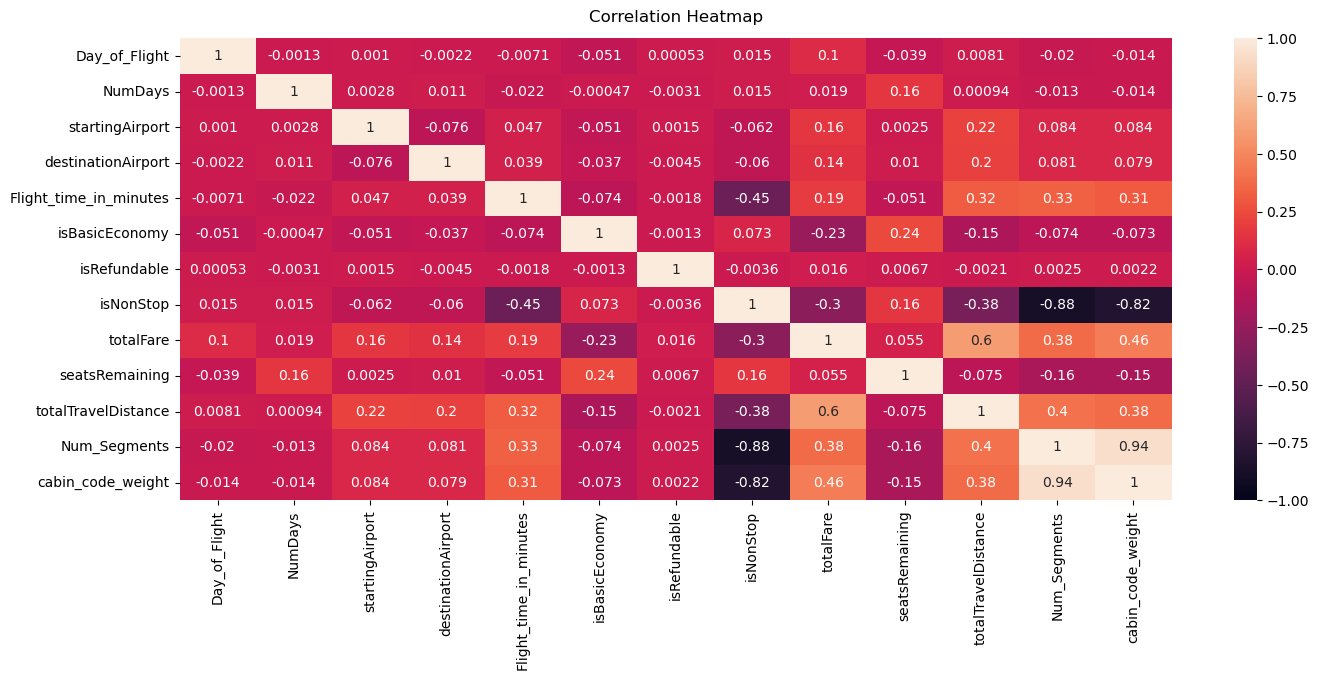

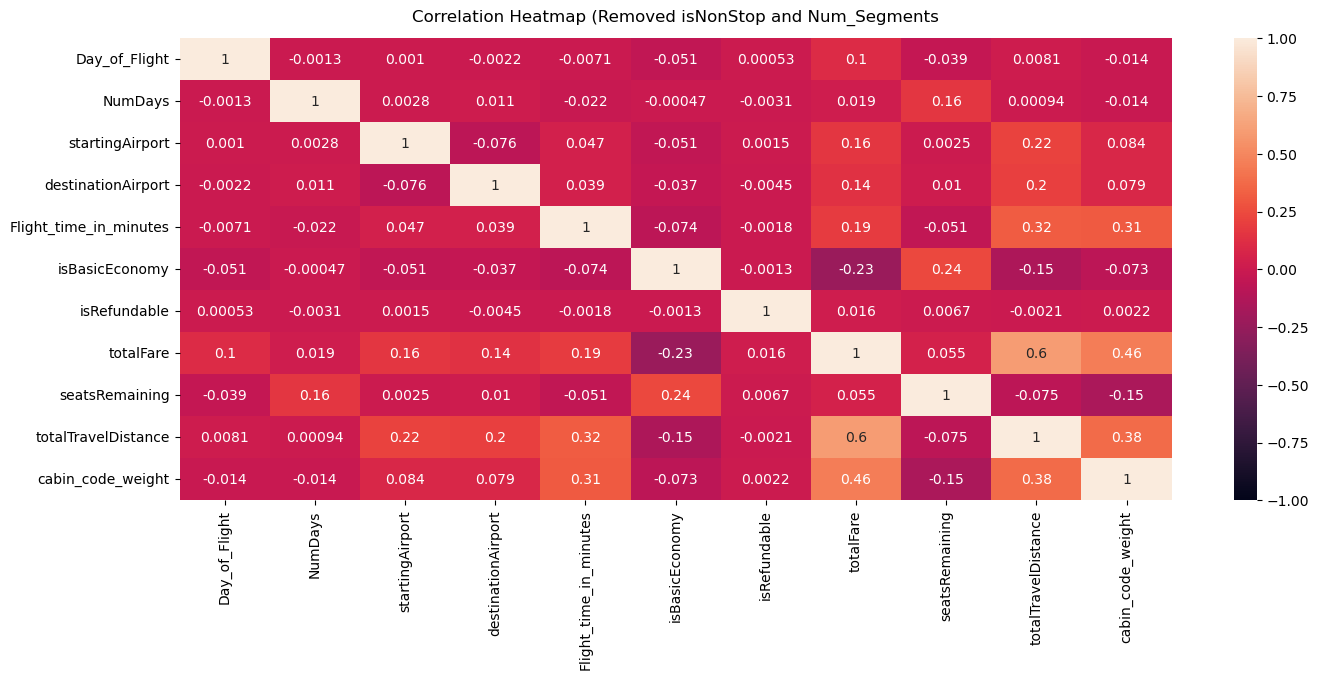

In [8]:
#Multicollinearity

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

'''
isNonStop is Highly Correlated with Num_Segments and cabin_code_weights.
Moreover, Num_Segments and cabin_code_weights are highly correlated with each other.
So, removing isNonStop and Num_Segments to minimise Multicollinearity.
Keeping cabin_code_weights as it is most correlated with the target variable out of the three
'''
data.drop(columns=['isNonStop','Num_Segments'],axis=1,inplace=True)
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap (Removed isNonStop and Num_Segments', fontdict={'fontsize':12}, pad=12)